In [270]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

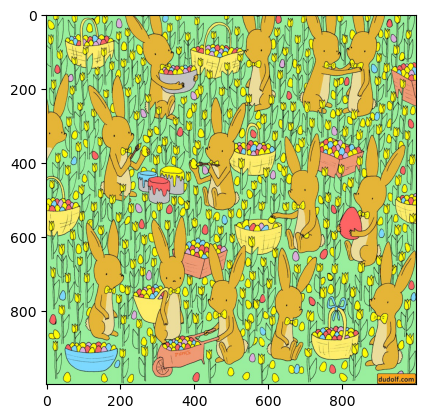

In [271]:
# Load the image
rabbit = cv2.imread('rabbit.jpeg')
# Show the image
plt.imshow(rabbit[:,:,::-1])

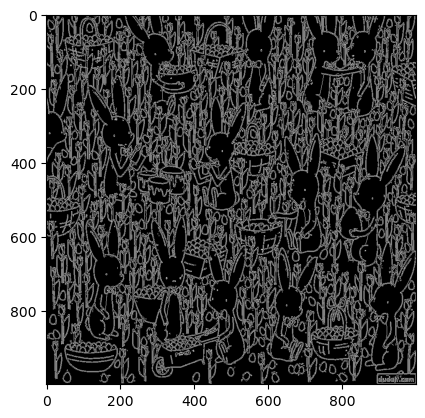

In [272]:
# Edge detection by canny
edges = cv2.Canny(rabbit,100,200)
# Show the image
plt.imshow(edges, cmap='gray')


In [273]:
# List template_edges
list_edges = []

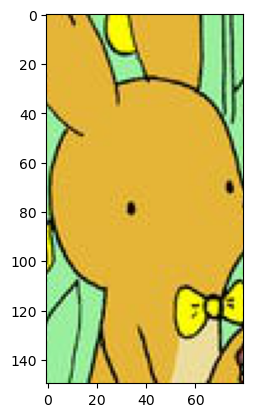

In [274]:
# Get template of the rabbit
template1 = rabbit[250:400, 150:230]
# Show the template
plt.imshow(template1[:,:,::-1])

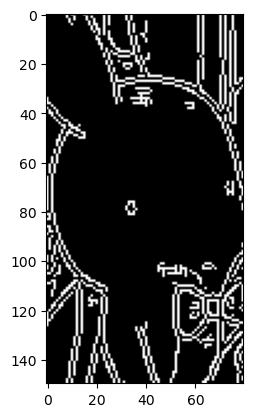

In [275]:
# Apply edge detection to the template
edges_template1= cv2.Canny(template1,100,200)
# Show the image
plt.imshow(edges_template1, cmap='gray')
# Add the edge to the list
list_edges.append(edges_template1)


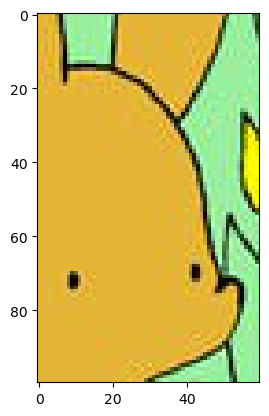

In [276]:
# Get template of the rabbit
template2 = rabbit[250: 350, 0: 60]
# Show the template
plt.imshow(template2[:,:,::-1])

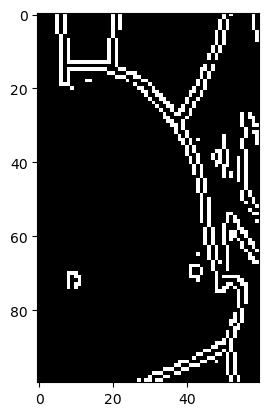

In [277]:
# Apply edge detection to the template
edges_template = cv2.Canny(template2,100,200)
# Show the image
plt.imshow(edges_template, cmap='gray')
# Add the edge to the list
list_edges.append(edges_template)

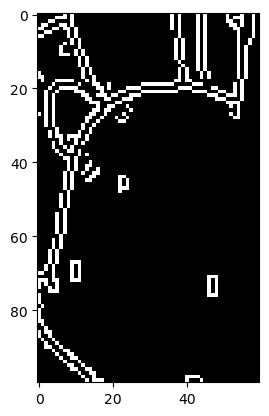

In [278]:
# Get template of the rabbit
template3 = rabbit[700:800, 440: 500]
# Show the template
plt.imshow(template3[:,:,::-1])

# Apply edge detection to the template
edges_template = cv2.Canny(template3,100,200)
# Show the image
plt.imshow(edges_template, cmap='gray')
# Add the edge to the list
list_edges.append(edges_template)

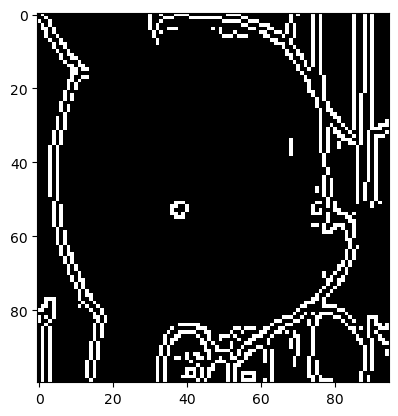

In [279]:
# Get template of the rabbit    
template4 = rabbit[650:750, 125: 220]
# Show the template
plt.imshow(template4[:,:,::-1])

# Apply edge detection to the template
edges_template = cv2.Canny(template4,100,200)
# Show the image
plt.imshow(edges_template, cmap='gray')
# Add the edge to the list
list_edges.append(edges_template)

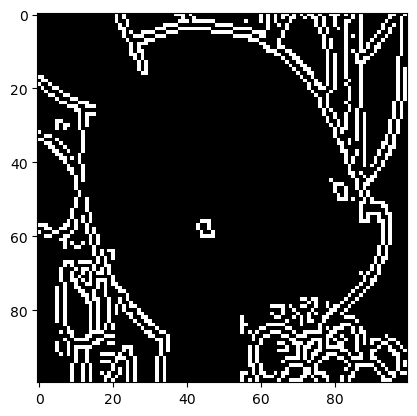

In [280]:
# Get template of the rabbit
template5 = rabbit[50:150, 250: 350]
# Show the template
plt.imshow(template5[:,:,::-1])

# Apply edge detection to the template
edges_template = cv2.Canny(template5,100,200)
# Show the image
plt.imshow(edges_template, cmap='gray')
# Add the edge to the list
list_edges.append(edges_template)


In [281]:
# Non-Maximum Suppression (NMS)
def non_max_suppression(boxes, overlapThresh):
    if len(boxes) == 0:
        return []
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")
    pick = []
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)
    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / area[idxs[:last]]
        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))
    return boxes[pick].astype("int")

# Count the number of pair_boot with NMS
def count_rabbit(image, templates, edges):

    # Apply template matching and collect bounding boxes
    boxes = []
    threshold = 0.18

    for template in templates:
        res = cv2.matchTemplate(edges, template, cv2.TM_CCOEFF_NORMED)
        loc = np.where(res >= threshold)
        
        for pt in zip(*loc[::-1]):
            box = [pt[0], pt[1], pt[0] + template.shape[1], pt[1] + template.shape[0]]
            boxes.append(box)

    # Convert boxes to numpy array
    boxes = np.array(boxes)

    # Apply non-max suppression
    if len(boxes) > 0:
        boxes = non_max_suppression(boxes, overlapThresh=0.1)

    # Draw rectangles for remaining boxes
    for (x1, y1, x2, y2) in boxes:
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Show the image with bounding boxes
    plt.imshow(image[:,:,::-1])
    plt.title(f'Number of objects found: {len(boxes)}')
    plt.axis('off')
    plt.show()

    return len(boxes)

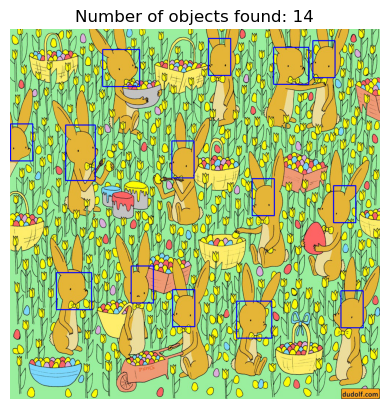

Number of rabbits found: 14


In [282]:
# Count the number of rabbits
count_rabbit = count_rabbit(rabbit.copy(), list_edges, edges)
print(f'Number of rabbits found: {count_rabbit}')